# Assignment 2

### 2- In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset 

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as tran
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [25]:
tran = tran.Compose([
    tran.ToTensor(),  
    tran.Normalize((0.1307,), (0.3081,))  #this is to Normalize with mean and std
])

FirstTrainData = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
FirstTestData = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(FirstTrainData, batch_size=64, shuffle=True)
test_loader = DataLoader(FirstTestData, batch_size=1000, shuffle=False)


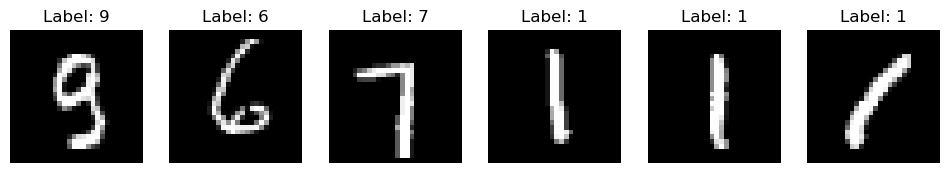

In [26]:
def visualize_qmnist(data_loader, num_images=6):
    # Get a batch of training images
    data_iter = iter(data_loader)
    images, labels = next(data_iter)  # Use next() to get the first batch
    
    # Plot the images in the batch
    fig, axes = plt.subplots(1, num_images, figsize=(12, 4))
    for i in range(num_images):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(f'Label: {labels[i].item()}')
        axes[i].axis('off')
    plt.show()

# Visualize some images from QMNIST
visualize_qmnist(train_loader)

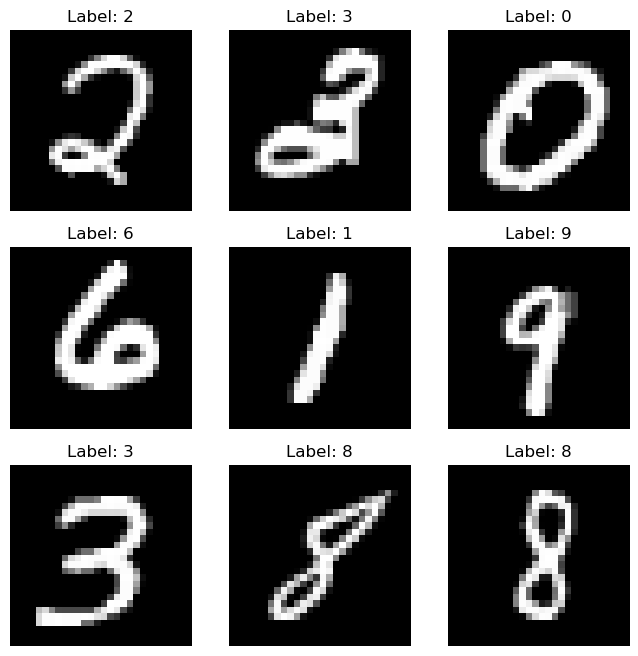

In [27]:
# Visualize the test dataset
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(FirstTestData), size=(1,)).item()
    img, label = FirstTestData[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(f'Label: {label}')
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [28]:
# Define the neural network architecture for QMNIST
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer to first hidden layer
        self.fc2 = nn.Linear(128, 64)       # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(64, 10)        # Second hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the 28x28 input images
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network for QMNIST
model = MLP()

### 3- Report on the results in terms of prediction accuracy on the train and test datasets

In [29]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network on the QMNIST dataset
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 0.7507481563091278
Epoch 1, Batch 200, Loss: 0.35701928436756136
Epoch 1, Batch 300, Loss: 0.2656426803022623
Epoch 1, Batch 400, Loss: 0.24471366576850415
Epoch 1, Batch 500, Loss: 0.22475007466971875
Epoch 1, Batch 600, Loss: 0.191103161200881
Epoch 1, Batch 700, Loss: 0.18328881192952395
Epoch 1, Batch 800, Loss: 0.16517075017094612
Epoch 1, Batch 900, Loss: 0.17252349521964788
Epoch 2, Batch 100, Loss: 0.13790451930835843
Epoch 2, Batch 200, Loss: 0.11818829074501991
Epoch 2, Batch 300, Loss: 0.12692921413108707
Epoch 2, Batch 400, Loss: 0.1275392660871148
Epoch 2, Batch 500, Loss: 0.12683207508176564
Epoch 2, Batch 600, Loss: 0.12950636815279723
Epoch 2, Batch 700, Loss: 0.11478969346731902
Epoch 2, Batch 800, Loss: 0.10829249026253819
Epoch 2, Batch 900, Loss: 0.11880509339272977
Epoch 3, Batch 100, Loss: 0.08524348329752683
Epoch 3, Batch 200, Loss: 0.09210634500719607
Epoch 3, Batch 300, Loss: 0.07535734883509576
Epoch 3, Batch 400, Loss: 0.08805174465

In [30]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 96.86%


In [31]:
model.eval()
predictions = []
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        # Convert predictions to numpy and store them
        predictions.extend(predicted.cpu().numpy())  # Move tensor to CPU before converting to numpy
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 96.86%


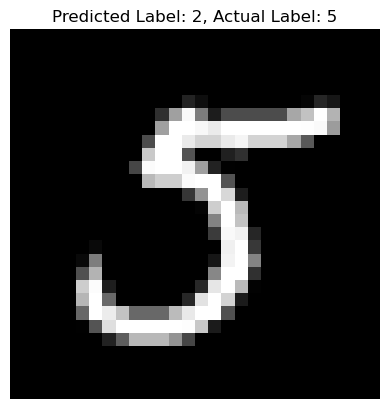

In [37]:
# Get one test image and its label
image, label = images[1], labels[1]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.cpu().numpy()  # Ensure the tensor is moved to CPU before converting to numpy

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[1]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

showing wrong prediction 

### 4- Choose one of the proposed modifications below

#### Add another Dense layer of 128 nodes

Hypothesize how it would change the performance results:
This will help in increasing the models capacity to basicaaly differenciate complex tasks like telling the difference bewteen similar looking numbers. This will help in increasing the learning ability of the model to detect the complex features. 

In [42]:
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Load the QMNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with mean and std
])

train_dataset = datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

### 5- Modify the model based on the chosen method and train

In [43]:

class ModifiedMLP(nn.Module):
    def __init__(self):
        super(ModifiedMLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128) 
        self.fc2 = nn.Linear(128, 128)      #  Adding Another Dense Layer of 128 Nodes
        self.fc3 = nn.Linear(128, 64)       
        self.fc4 = nn.Linear(64, 10)       
    def forward(self, x):
        x = x.view(-1, 28 * 28)             
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))         
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

modelnew = ModifiedMLP()

print('This is the new model ''modelnew'' architecture to basically verify the modification ',modelnew)

This is the new model modelnew architecture to basically verify the modification  ModifiedMLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [44]:


# Initialize the modified model
modelnew = ModifiedMLP()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelnew.parameters(), lr=0.001)

# Train the modified neural network
num_epochs = 5
for epoch in range(num_epochs):
    modelnew.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = modelnew(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')


Epoch 1, Batch 100, Loss: 0.8251295740902423
Epoch 1, Batch 200, Loss: 0.3348378924280405
Epoch 1, Batch 300, Loss: 0.274042282551527
Epoch 1, Batch 400, Loss: 0.22782042756676674
Epoch 1, Batch 500, Loss: 0.22089141853153704
Epoch 1, Batch 600, Loss: 0.20117520965635777
Epoch 1, Batch 700, Loss: 0.18137603543698788
Epoch 1, Batch 800, Loss: 0.16463984113186597
Epoch 1, Batch 900, Loss: 0.15064507331699134
Epoch 2, Batch 100, Loss: 0.12490918565541506
Epoch 2, Batch 200, Loss: 0.12942522438243032
Epoch 2, Batch 300, Loss: 0.12863109990023078
Epoch 2, Batch 400, Loss: 0.09966310484334827
Epoch 2, Batch 500, Loss: 0.11785555928014219
Epoch 2, Batch 600, Loss: 0.11993815014138817
Epoch 2, Batch 700, Loss: 0.10499951167032123
Epoch 2, Batch 800, Loss: 0.11505110783502459
Epoch 2, Batch 900, Loss: 0.10733258286491036
Epoch 3, Batch 100, Loss: 0.09229339812882245
Epoch 3, Batch 200, Loss: 0.09384526588022708
Epoch 3, Batch 300, Loss: 0.07793211231008172
Epoch 3, Batch 400, Loss: 0.0767228640

In [48]:
# Load the QMNIST test dataset
test_dataset = datasets.QMNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Evaluate the modified model on the QMNIST test dataset
modelnew.eval()
correct = 0
total = 0
predictions = []
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = modelnew(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracyofnewmodel = 100 * correct / total
print(f'Accuracy on the test set of the modified model: {accuracyofnewmodel:.2f}%')


Accuracy on the test set of the modified model: 97.18%


### 6- Report on the results of the modified model and if it matches your hypothesis

### 7- Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

In [66]:
# Initialize the model
modelnew = ModifiedMLP()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'SGD - Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training with SGD Optimizer')

SGD - Epoch 1, Batch 100, Loss: 0.00827553087263368
SGD - Epoch 1, Batch 200, Loss: 0.003345763402171542
SGD - Epoch 1, Batch 300, Loss: 0.006717359465837945
SGD - Epoch 1, Batch 400, Loss: 0.005036717600762586
SGD - Epoch 1, Batch 500, Loss: 0.00455007920742446
SGD - Epoch 1, Batch 600, Loss: 0.005478059608631156
SGD - Epoch 1, Batch 700, Loss: 0.0019452117056880526
SGD - Epoch 1, Batch 800, Loss: 0.00527936599871964
SGD - Epoch 1, Batch 900, Loss: 0.0026613482243919863
SGD - Epoch 2, Batch 100, Loss: 0.0009039496556306403
SGD - Epoch 2, Batch 200, Loss: 0.0009938725729352882
SGD - Epoch 2, Batch 300, Loss: 0.00068138420518153
SGD - Epoch 2, Batch 400, Loss: 0.0008513239377407444
SGD - Epoch 2, Batch 500, Loss: 0.0010845827538287266
SGD - Epoch 2, Batch 600, Loss: 0.0014164898623653243
SGD - Epoch 2, Batch 700, Loss: 0.0020122620853180707
SGD - Epoch 2, Batch 800, Loss: 0.001256524486498165
SGD - Epoch 2, Batch 900, Loss: 0.0009014186360127496
SGD - Epoch 3, Batch 100, Loss: 0.0004465

In [67]:
# Evaluate the model
modelnew.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set after SGD Optimizer: {accuracy:.2f}%')

Accuracy on the test set after SGD Optimizer: 98.09%


In [68]:
# Initialize the model
modelnew = ModifiedMLP()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'RMSprop - Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training with RMSprop Optimizer')

RMSprop - Epoch 1, Batch 100, Loss: 0.057594943838269616
RMSprop - Epoch 1, Batch 200, Loss: 0.020604122808971965
RMSprop - Epoch 1, Batch 300, Loss: 0.01782489703241879
RMSprop - Epoch 1, Batch 400, Loss: 0.013128173333633412
RMSprop - Epoch 1, Batch 500, Loss: 0.01425962608232794
RMSprop - Epoch 1, Batch 600, Loss: 0.02133756498782077
RMSprop - Epoch 1, Batch 700, Loss: 0.016774093498111427
RMSprop - Epoch 1, Batch 800, Loss: 0.015003449729684917
RMSprop - Epoch 1, Batch 900, Loss: 0.017120502127845612
RMSprop - Epoch 2, Batch 100, Loss: 0.008635762034533628
RMSprop - Epoch 2, Batch 200, Loss: 0.012071608847472817
RMSprop - Epoch 2, Batch 300, Loss: 0.01376221705609396
RMSprop - Epoch 2, Batch 400, Loss: 0.019168083770537123
RMSprop - Epoch 2, Batch 500, Loss: 0.01649295761145254
RMSprop - Epoch 2, Batch 600, Loss: 0.009796825609469125
RMSprop - Epoch 2, Batch 700, Loss: 0.020924208516935893
RMSprop - Epoch 2, Batch 800, Loss: 0.010947268318291207
RMSprop - Epoch 2, Batch 900, Loss: 

In [69]:
# Evaluate the model
modelnew.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set after RMSprop Optimizer: {accuracy:.2f}%')

Accuracy on the test set after RMSprop Optimizer: 97.60%


In [71]:
# Initialize the model
modelnew = ModifiedMLP()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
        # Convert labels to one-hot encoding for MSELoss
        labels_one_hot = torch.nn.functional.one_hot(labels, num_classes=10).float()
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels_one_hot)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'MSE - Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training with MSE Loss')

# Evaluate the model
modelnew.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set after MSE Loss: {accuracy:.2f}%')

MSE - Epoch 1, Batch 100, Loss: 0.038404599316418174
MSE - Epoch 1, Batch 200, Loss: 0.031155221071094273
MSE - Epoch 1, Batch 300, Loss: 0.02792476464062929
MSE - Epoch 1, Batch 400, Loss: 0.0257039082236588
MSE - Epoch 1, Batch 500, Loss: 0.024577207565307617
MSE - Epoch 1, Batch 600, Loss: 0.023963981401175262
MSE - Epoch 1, Batch 700, Loss: 0.023158919624984266
MSE - Epoch 1, Batch 800, Loss: 0.02333525810390711
MSE - Epoch 1, Batch 900, Loss: 0.023113490771502255
MSE - Epoch 2, Batch 100, Loss: 0.021593415718525646
MSE - Epoch 2, Batch 200, Loss: 0.021962590143084527
MSE - Epoch 2, Batch 300, Loss: 0.02212824461981654
MSE - Epoch 2, Batch 400, Loss: 0.02232949098572135
MSE - Epoch 2, Batch 500, Loss: 0.021880355896428227
MSE - Epoch 2, Batch 600, Loss: 0.021763530168682335
MSE - Epoch 2, Batch 700, Loss: 0.021714199809357525
MSE - Epoch 2, Batch 800, Loss: 0.021575242346152664
MSE - Epoch 2, Batch 900, Loss: 0.021576138949021696
MSE - Epoch 3, Batch 100, Loss: 0.02139580650255084


In [72]:
# Define the neural network with dropout
class ModifiedMLPWithDropout(nn.Module):
    def __init__(self):
        super(ModifiedMLPWithDropout, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.25)
        self.fc2 = nn.Linear(128, 128)
        self.dropout2 = nn.Dropout(0.25)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)  # Apply dropout
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)  # Apply dropout
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the modified model with dropout
modelnew = ModifiedMLPWithDropout()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model with dropout
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Dropout - Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training with Dropout')

# Evaluate the model
modelnew.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set after dropout: {accuracy:.2f}%')

Dropout - Epoch 1, Batch 100, Loss: 0.7072926089167595
Dropout - Epoch 1, Batch 200, Loss: 0.49781426578760146
Dropout - Epoch 1, Batch 300, Loss: 0.4183750095963478
Dropout - Epoch 1, Batch 400, Loss: 0.35245897859334946
Dropout - Epoch 1, Batch 500, Loss: 0.13769448800710962
Dropout - Epoch 1, Batch 600, Loss: 0.040263966186903415
Dropout - Epoch 1, Batch 700, Loss: 0.0375491330458317
Dropout - Epoch 1, Batch 800, Loss: 0.039702816909994
Dropout - Epoch 1, Batch 900, Loss: 0.02473827091176645
Dropout - Epoch 2, Batch 100, Loss: 0.022990714357292746
Dropout - Epoch 2, Batch 200, Loss: 0.014540646058158017
Dropout - Epoch 2, Batch 300, Loss: 0.01914439535277779
Dropout - Epoch 2, Batch 400, Loss: 0.02274506539448339
Dropout - Epoch 2, Batch 500, Loss: 0.019542443085665582
Dropout - Epoch 2, Batch 600, Loss: 0.02098520162900968
Dropout - Epoch 2, Batch 700, Loss: 0.015290018461237197
Dropout - Epoch 2, Batch 800, Loss: 0.022242374242923687
Dropout - Epoch 2, Batch 900, Loss: 0.015352704

In [73]:
# Define the neural network with tanh activation
class ModifiedMLPWithTanh(nn.Module):
    def __init__(self):
        super(ModifiedMLPWithTanh, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.tanh(self.fc1(x))  # Using tanh activation
        x = torch.tanh(self.fc2(x))  # Using tanh activation
        x = torch.tanh(self.fc3(x))  # Using tanh activation
        x = self.fc4(x)
        return x

# Initialize the model with tanh activation
modelnew = ModifiedMLPWithTanh()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model with tanh activation
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Tanh Activation - Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training with Tanh Activation')


# Evaluate the model
modelnew.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set after Tanh Activation: {accuracy:.2f}%')

Tanh Activation - Epoch 1, Batch 100, Loss: 0.006607833274563291
Tanh Activation - Epoch 1, Batch 200, Loss: 0.010786891182884801
Tanh Activation - Epoch 1, Batch 300, Loss: 0.012239427611963265
Tanh Activation - Epoch 1, Batch 400, Loss: 0.015639572989440645
Tanh Activation - Epoch 1, Batch 500, Loss: 0.012946894485449435
Tanh Activation - Epoch 1, Batch 600, Loss: 0.02393206746316537
Tanh Activation - Epoch 1, Batch 700, Loss: 0.016757413547854868
Tanh Activation - Epoch 1, Batch 800, Loss: 0.014801206123149769
Tanh Activation - Epoch 1, Batch 900, Loss: 0.02163590364281845
Tanh Activation - Epoch 2, Batch 100, Loss: 0.003916728422409505
Tanh Activation - Epoch 2, Batch 200, Loss: 0.007371184928310868
Tanh Activation - Epoch 2, Batch 300, Loss: 0.007247665797979153
Tanh Activation - Epoch 2, Batch 400, Loss: 0.012824440564351107
Tanh Activation - Epoch 2, Batch 500, Loss: 0.010672280179087466
Tanh Activation - Epoch 2, Batch 600, Loss: 0.012828484264882718
Tanh Activation - Epoch 2, 

In [62]:
# Evaluate the model
modelnew.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 97.69%
